<img heigth="8" src="https://i.imgur.com/5VTYUPE.png" alt="banner">

<h1 align="left">Data/ML Notebook</h1>

<p align="left"><i>A chill starting point for whipping up data projects that actually work, stay sane, and won’t break when you look at them funny.</i></p>

<p align="left">
  <a href="https://joefavergel.github.io">Joseph F. Vergel-Becerra</a>
  <br>
  <b>Last updated:</b> <i>12/04/2025</i>
  <br><br>
  <a target="_blank">
    <img src="https://github.com/QData/TextAttack/workflows/Github%20PyTest/badge.svg" alt="Testing">
  </a>
  <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
    <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
  </a>
</p><br>
<p align="left">
  <a href="#introduction">Introduction</a><br>
  <a href="#1-data-adquisition">1. Data Adquisition</a><br>
  <a href="#2-exploratory-data-analysis">2. Exploratory Data Analysis</a><br>
  <a href="#3-training-models">3. Training Models</a><br>
  <br>
</p>

---

With this notebook you can test the template to develop your predictive solution.

<a id="1-data-extraction"></a>
## Introduction

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
try:
    import importlib

    __package__ = "src"

    found = False
    while not found:
        os.chdir(os.path.join(os.getcwd(), os.pardir))
        found = bool(importlib.util.find_spec(__package__))
        if found:
            print(f"[INFO] WORKDIR: {os.path.join(os.getcwd(), os.pardir)}")
        continue
except ModuleNotFoundError as e:
    print("[ERROR] Verify WORKDIR execution: ", e)

[INFO] WORKDIR: /Users/joefaver/Codes/self/data-project-template/..


In [3]:
import src
from src.utils import set_seed_everything

print(f"[INFO] Package version: {src.__version__}")

[INFO] Package version: v0.1.0


In [4]:
SEED = 42
set_seed_everything(SEED)

<a id="1-model-family-settings-validation"></a>
## 1. Data Adquisition

In [5]:
iris = datasets.load_iris()
data = pd.concat(
    [
        pd.DataFrame(iris.data, columns=iris.feature_names),
        pd.Series(iris.target, name="specie"),
    ],
    axis=1,
)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
train, test = train_test_split(
    data, test_size=0.3, stratify=data["specie"], random_state=SEED
)

<a id="2-exploratory-data-analysis"></a>
## 2. Exploratory Data Analysis

In [7]:
train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,5.873333,3.055238,3.784762,1.205714,1.000000
std,0.862941,0.457203,1.784052,0.777549,0.820413
min,4.300000,2.000000,1.100000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.200000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.900000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


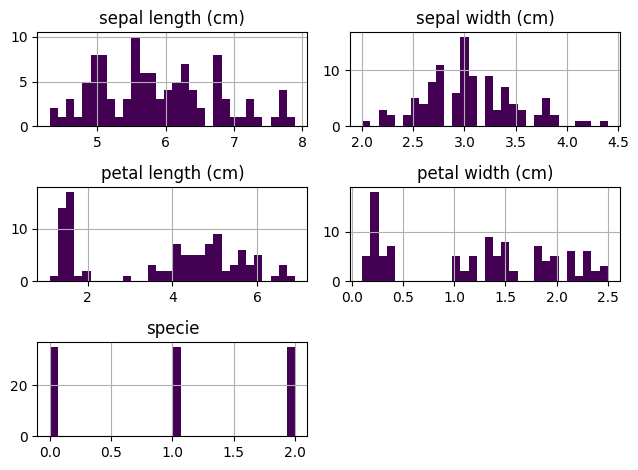

In [8]:
train.hist(bins=30, color="#440154")
plt.tight_layout()
plt.show()

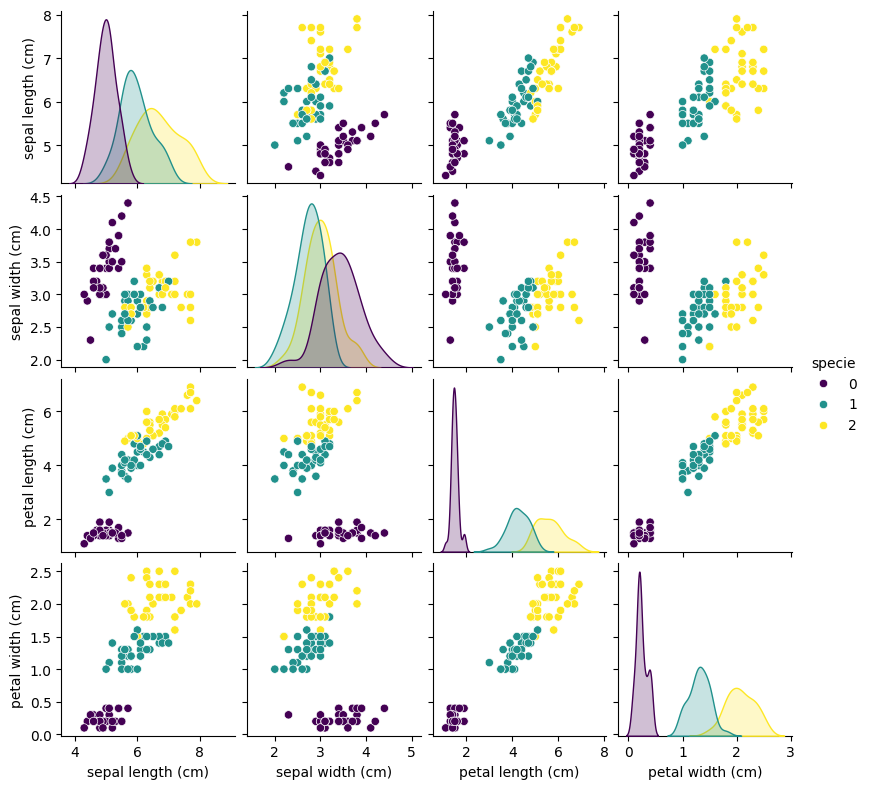

In [9]:
sns.pairplot(train, hue="specie", height=2, palette="viridis")
plt.show()

<a id="3-training-models"></a>
## 3. Training Models

In [10]:
X_train, X_test = train.drop(["specie"], axis=1), test.drop(["specie"], axis=1)
y_train, y_test = train["specie"], test["specie"]
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,5.1,2.5,3.0,1.1
68,6.2,2.2,4.5,1.5
19,5.1,3.8,1.5,0.3
143,6.8,3.2,5.9,2.3
99,5.7,2.8,4.1,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
79,5.7,2.6,3.5,1.0
33,5.5,4.2,1.4,0.2
94,5.6,2.7,4.2,1.3


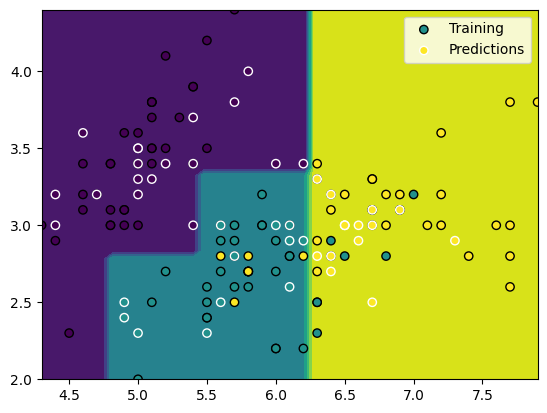

In [11]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max()),
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
clf = DecisionTreeClassifier(max_depth=3, random_state=SEED).fit(
    X_train.values[:, :2], y_train.values
)
y_pred = np.reshape(clf.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()

display.ax_.scatter(
    X_train.values[:, 0],
    X_train.values[:, 1],
    c=y_train.values,
    edgecolor="black",
    label="Training",
)

y_pred = clf.predict(X_test.values[:, :2])
display.ax_.scatter(
    X_test.values[:, 0],
    X_test.values[:, 1],
    c=y_pred,
    edgecolor="w",
    label="Predictions",
)
plt.legend()
plt.show()

In [12]:
clf = DecisionTreeClassifier(max_depth=3, random_state=SEED)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

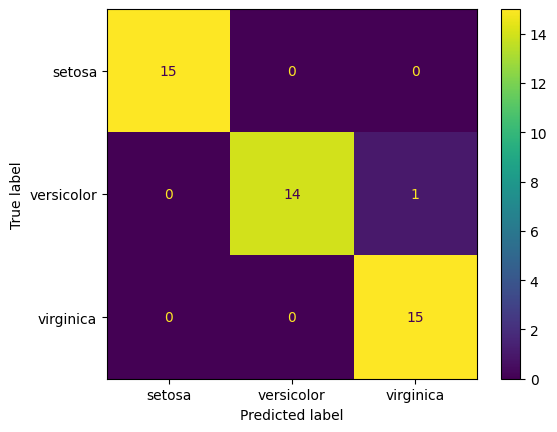

In [13]:
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_true=y_test.values, y_pred=y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=iris.target_names
)
disp.plot()
plt.show()